In [1]:
import numpy as np
from autograd import numpy as anp
import  matplotlib.pyplot as plt
from matplotlib import ticker
from python_files.maxent import MaxEnt
import python_files.densities as d

Estimate of absolute integration error of norm. const.: 6.040e-14
The resulting parameters:
  Lambda_1 = -1.010


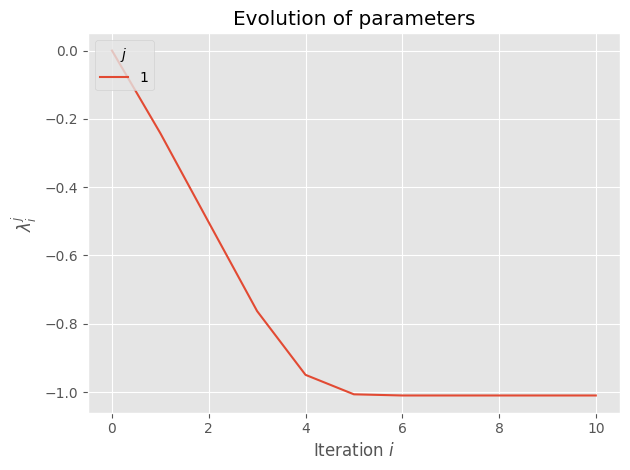

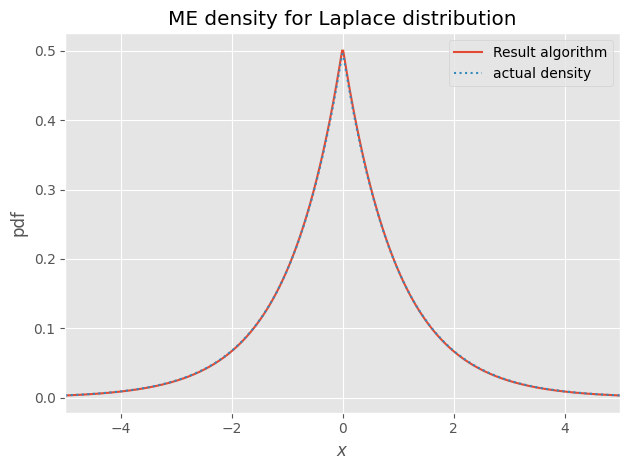

Absolute error: 1.00e-02 


In [5]:
c  = 1                              #>0

l,u = -7,7                        #bounds for calculating
n = 50                              #amount of points of Gaussian quadrature


ob_pareto = MaxEnt(support=[l,u],
                   n_quadrature=n,
                   b_constraints=b(c),
                   f_vector=f_laplace, 
                   message_norm=True,
                   warning_convergence=True)
ob_pareto.visualize_algorithm(title_save="figs/viz_alg_example_laplace_good.pdf")
ob_pareto.visualize_solution(xlim=[-5,5],
                             actual_density=pdf_laplace,
                             actual_param=[c], 
                             title="ME density for Laplace distribution",
                             title_save="figs/viz_sol_example_laplace_good.pdf")
error = ob_pareto.calc_error(to_lagrange_laplace(c))
print(f"Absolute error: {error:.2e} ")

Estimate of absolute integration error of norm. const.: 7.114e-12
The resulting parameters:
  Lambda_1 = -1.171


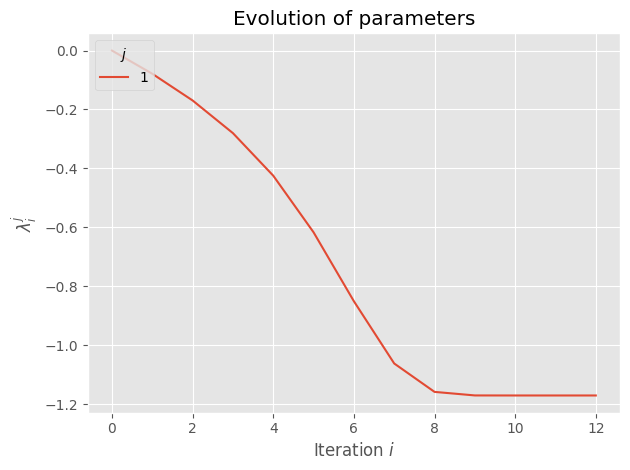

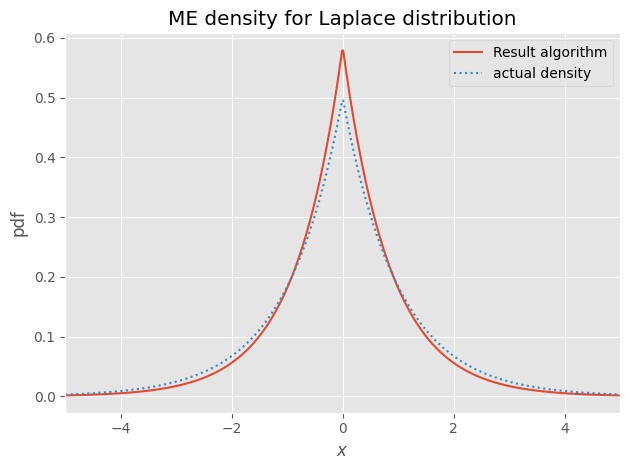

Absolute error: 1.71e-01 


In [6]:
c  = 1                              #>0

l,u = -20,20                        #bounds for calculating
n = 50                              #amount of points of Gaussian quadrature


ob_pareto = MaxEnt(support=[l,u],
                   n_quadrature=n,
                   b_constraints=b(c),
                   f_vector=f_laplace, 
                   message_norm=True,
                   warning_convergence=True)
ob_pareto.visualize_algorithm(title_save="figs/viz_alg_example_laplace_bad.pdf")
ob_pareto.visualize_solution(xlim=[-5,5],
                             actual_density=pdf_laplace,
                             actual_param=[c], 
                             title="ME density for Laplace distribution",
                             title_save="figs/viz_sol_example_laplace_bad.pdf")
error = ob_pareto.calc_error(to_lagrange_laplace(c))
print(f"Absolute error: {error:.2e} ")

Estimate of absolute integration error of norm. const.: 2.042e-13
The resulting parameters:
  Lambda_1 = -1.011


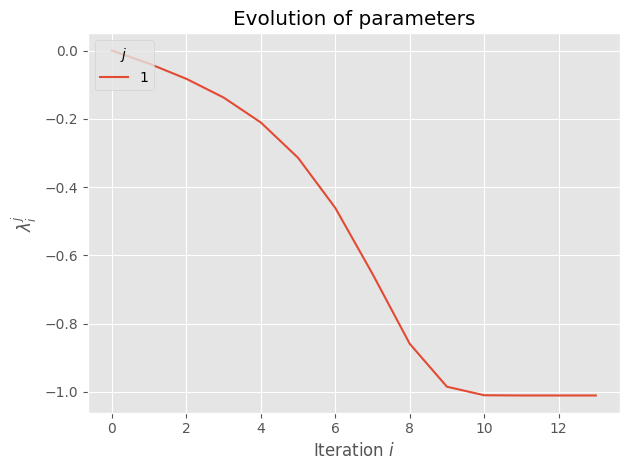

Absolute error: 1.09e-02 


In [8]:
c  = 1                              #>0

l,u = -40,40                        #bounds for calculating
n = 350                              #amount of points of Gaussian quadrature


ob_pareto_non_conv = MaxEnt(support=[l,u],
                   n_quadrature=n,
                   b_constraints=b(c),
                   f_vector=f_laplace, 
                   message_norm=True,
                   warning_convergence=True)
ob_pareto_non_conv.visualize_algorithm(title_save="figs/viz_alg_example_laplace_non_converging.pdf")
# ob_pareto.visualize_solution(xlim=[-5,5],
#                              actual_density=pdf_laplace,
#                              actual_param=[c], 
#                              title="ME density for Laplace distribution",
#                              title_save="figs/viz_sol_example_laplace_bad.pdf")
error = ob_pareto_non_conv.calc_error(to_lagrange_laplace(c))
print(f"Absolute error: {error:.2e} ")

In [10]:
def test_percentage_barrier_laplace(n, figure1=True,figure2=True,figure3=True,short=False):
    N_c = 20
    N_u = 30

    arr_c = np.linspace(1, 20, N_c)
    arr_u = np.linspace(10, 100, N_u)
    Cs, Us = np.meshgrid(arr_c,arr_u)

    convergence_indicator_mat = np.zeros((N_c,N_u))
    error_lambda = np.full((N_c,N_u), 100, dtype=float)

    for i in range(N_c):
        c = arr_c[i]
        for j in range(N_u):
            u = arr_u[j]
            l = -u
            ob_pareto = MaxEnt(support=[l,u], 
                               n_quadrature=n, 
                               b_constraints=b(c), 
                               f_vector=f_laplace,
                               warning_convergence=False)
            if(ob_pareto._converges):
                convergence_indicator_mat[i][j] = 1
                error_lambda[i][j] = ob_pareto.calc_error(to_lagrange_laplace(c))
            else:
                convergence_indicator_mat[i][j] = 0

    inside_interval = cdf_laplace(Us,Cs)-cdf_laplace(l,Cs)

    if(figure1):
        fig, ax=plt.subplots(1,2,sharey=True,sharex=True, figsize=(10,5))
        ax[0].set_title(f"Convergence?") 
        ax[0].set_xlabel("$c$")
        ax[0].set_ylabel("$u$")

        cset1 = ax[0].contourf(Cs,Us,convergence_indicator_mat.T, levels=1)
        fig.colorbar(cset1, ax=ax[0])

        ax[1].set_title(f"Percentage of mass inside $[-u,u]$") 
        ax[1].set_xlabel("$c$")

        levels = np.linspace(0.0, 1.0, 11)
        cset2= ax[1].contourf(Cs,Us, inside_interval, levels=levels)
        cset2.set_clim(0, 1.0)
        fig.colorbar(cset2, ax=ax[1])
        fig.suptitle(f"Laplace($c$,0)")
        plt.tight_layout()
        plt.show()
    
    if(figure2):
        fig, ax = plt.subplots()
        ax.scatter(inside_interval, convergence_indicator_mat.T)
        # ax.set_xlim(1-0.38,1-0.36)
        ax.set_xlabel("Fraction of prob. mass inside $S$")
        ax.set_ylabel("Convergence?")
        ax.set_title(f"Convergence on Laplace($c$,0)")

        plt.show()
    
    if(figure3):
        fig, ax=plt.subplots(1,2,figsize=(10,5))
        ax[0].set_title(f"Error of $\\lambda$") 
        ax[0].set_xlabel("$c$")
        ax[0].set_ylabel("$u$")

        levels = np.linspace(0.0, 0.5, 21)
        cset1 = ax[0].contourf(Cs,Us,error_lambda.T, levels=levels)
        fig.colorbar(cset1, ax=ax[0])

        ax[1].scatter(inside_interval, error_lambda.T)
        # ax[1].set_xlim(1-0.38,1-0.36)
        ax[1].set_ylim((0,.01))
        ax[1].set_xlim((.99,1))
        ax[1].set_xlabel("Fraction of prob. mass inside $S$")
        ax[1].set_ylabel("Error of $\\lambda$")
        ax[1].set_title(f"Quality of solution on Laplace($c$,0)")

        plt.tight_layout()
        plt.show()

    yes_conv = inside_interval[convergence_indicator_mat.T==1]
    # no_conv = inside_interval[convergence_indicator_mat.T==0]
    m1 =convergence_indicator_mat.T==0 
    m2 =  inside_interval>.9
    m3 =  inside_interval<.9
    no_conv1 = inside_interval[ np.all([m1,m3],axis=0)] #This value was guessed by eye!
    no_conv2 = inside_interval[ np.all([m1,m2],axis=0)]
    if(short):
        try:
            m = np.min(no_conv2)
            st = f" || {m}"
        except:
            st = ""
        print(f"n={n}  || boundary={(np.max(no_conv1)+np.min(yes_conv))/2}"+st)
    else:
        print(f"max value which doesn't converge1: {np.max(no_conv1)}")
        print(f"min value which does converge:     {np.min(yes_conv)}")
        print(f"avg. value of the two: {(np.max(no_conv1)+np.min(yes_conv))/2}\n")

        try:
            m = np.min(no_conv2)
            print(f"min value which doesn't converge2: {m}")
            print(f"max value which does converge:     {np.max(yes_conv)}")
            print(f"avg. value of the two: {(m+np.max(yes_conv))/2}")
        except:
            print("no value had a support so high that algo did not converge")

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def plot_solution_performance_test(title, outside_interval, 
                                   convergence_indicator_mat,
                                   Ns, error_lambda, MAXERR):
    to_delete_indices = np.where(error_lambda.flatten() == MAXERR)[0]
    error_lambda_flat = np.delete(error_lambda.flatten(), to_delete_indices)
    outside_interval_flat = np.delete(outside_interval.flatten(), to_delete_indices)
    Ns_flat = np.delete(Ns.flatten(), to_delete_indices)

    fig, ax = plt.subplots(3, 1, sharey=False, sharex=True, figsize=(4,10))
    fig.suptitle(f"Performance of Algorithm 2 on {title}")

    for i in range(3):
        ax[i].set_xscale("log")
        ax[i].set_yscale("log")
    
    #figure 0: contour plot of convergence
    cset1 = ax[0].contourf(outside_interval, Ns,
                        convergence_indicator_mat, levels=[-0.5,0.5,1.5])
    
    cbar = fig.colorbar(cset1, ax=ax[0])
    cbar.set_ticks([0,1])
    cbar.set_ticklabels(["no", "yes"])

    ax[0].set_title(f"Convergence") 
    ax[0].set_ylabel("Quadrature number $n$")

    #Fig 1: contour plot of quality converging values
    max_conv_error = np.max(error_lambda_flat)
    levels = np.linspace(0.0, max_conv_error, 25)
    cset1 = ax[1].contourf(outside_interval, Ns, error_lambda, 
                           levels=levels)
    
    cbar1 = fig.colorbar(cset1, ax=ax[1], format='%.2f')
    cbar1.set_label("$\\lambda_{\\text{err}}$", rotation=0)
    cbar1.locator = ticker.MaxNLocator(nbins=6)
    cbar1.update_ticks()

    ax[1].set_title(f"Quality of solutions (1)")
    ax[1].set_ylabel("Quadrature number $n$") 
    

    #Fig 2: lambda_err as function of left-out prob mass
    cset2 = ax[2].scatter(outside_interval_flat, error_lambda_flat, 
                          c=Ns_flat, norm="log")

    cbar2 = fig.colorbar(cset2, ax=ax[2])
    cbar2.set_label("$n$", rotation=0)

    ax[2].set_title("Quality of solutions (2)")
    ax[2].set_xlabel("Fraction of prob. mass outside $S$")
    ax[2].set_ylabel("$\\lambda_{\\text{err}}$")
    
    plt.tight_layout()
    plt.show()

In [4]:
def test_performance_algo(title,
                          b_constraint,
                          f_constraint,
                          f_param,
                          lambda_actual,
                          cdf,
                          lower_bound=None):
    
    #define parameters
    N_n = 20
    N_u = 20
    MAXERR = 1000
    
    arr_n = np.logspace(1, 2.5, N_n, dtype=int)
    arr_u = np.linspace(.2, 40, N_u)

    #do simulations
    Us, Ns = np.meshgrid(arr_u,arr_n)

    convergence_indicator_mat = np.zeros((N_n,N_u), dtype=int)
    error_lambda = np.full((N_n,N_u), MAXERR, dtype=float)
    outside_interval = np.zeros((N_n,N_u), dtype=float)

    for i in range(N_n):
        n = arr_n[i]
        for j in range(N_u):
            u = arr_u[j]
            if(lower_bound==None):
                l = -u
            else:
                l = lower_bound
            outside_interval[i][j] = 1 - cdf(u,*f_param) + cdf(l,*f_param)

            ob = MaxEnt(support=[l,u],
                               n_quadrature=n,
                               b_constraints=b_constraint(*f_param),
                               f_vector=f_constraint,
                               f_param=f_param,
                               warning_convergence=False)
            if(ob._converges):
                convergence_indicator_mat[i][j] = 1
                error_lambda[i][j] = ob.calc_error(lambda_actual(*f_param))
            else:
                convergence_indicator_mat[i][j] = 0

    #plot solution
    plot_solution_performance_test(title,
                                   outside_interval,
                                   convergence_indicator_mat,
                                   Ns, 
                                   error_lambda, 
                                   MAXERR)
    
    

/home/liselotp/BRP/max_entropy/python_files/maxent.py:363: RuntimeWarning: overflow encountered in exp
  c, s = quad(lambda x: np.exp(np.inner(self._la,


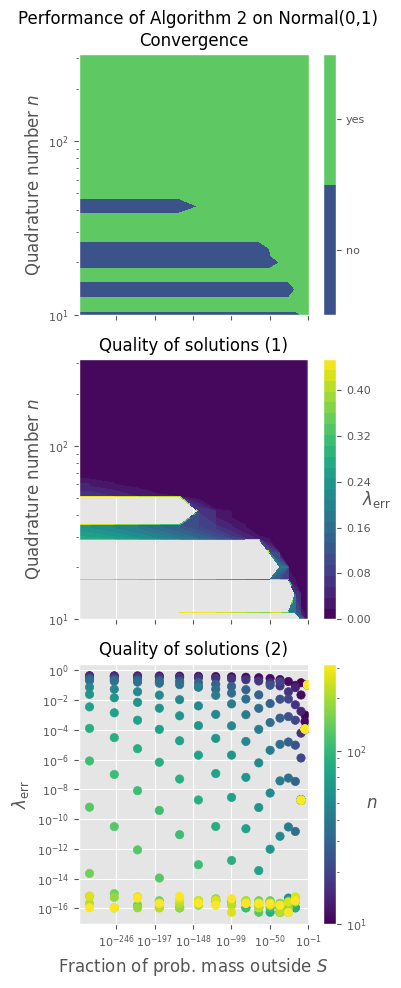

In [ ]:
#normal 1
mu, s2 = 0, 1
test_performance_algo(title=f"Normal({mu},{s2})",
                    b_constraint=d.b_constraint_normal1,
                    f_constraint=d.f_constraint_normal1,
                    f_param=(mu,s2),
                    lambda_actual=d.lambda_actual_normal1,
                    cdf=d.cdf_norm)

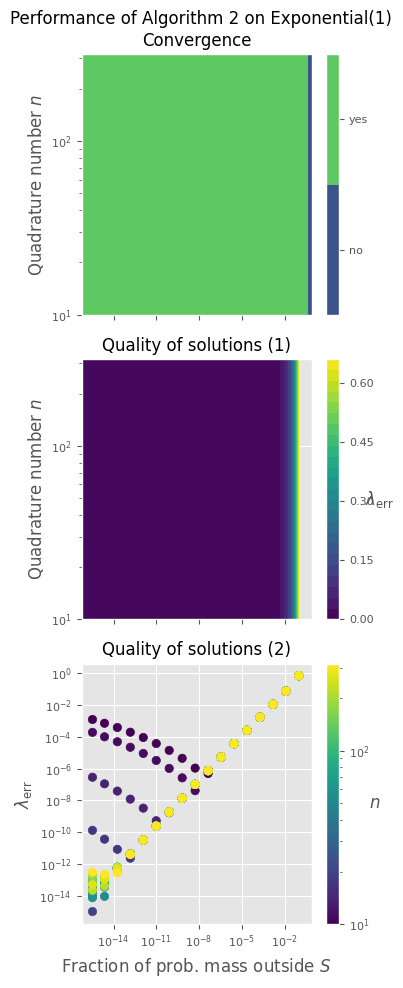

In [6]:
#Exponential
c = 1
test_performance_algo(title=f"Exponential({c})",
                    b_constraint=d.b_constraint_expon,
                    f_constraint=d.f_constraint_expon,
                    f_param=[c],
                    lambda_actual=d.lambda_actual_expon,
                    cdf=d.cdf_expon,
                    lower_bound=0)

/home/liselotp/BRP/max_entropy/python_files/maxent.py:363: RuntimeWarning: overflow encountered in exp
  c, s = quad(lambda x: np.exp(np.inner(self._la,


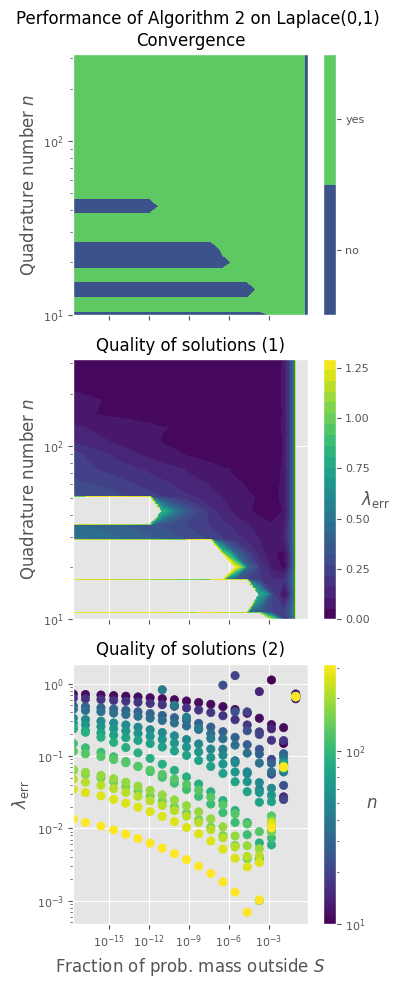

In [ ]:
#Laplace
mu, c = 0, 1
test_performance_algo(title=f"Laplace({mu},{c})",
                    b_constraint=d.b_constraint_laplace,
                    f_constraint=d.f_constraint_laplace,
                    f_param=(mu,c),
                    lambda_actual=d.lambda_actual_laplace,
                    cdf=d.cdf_laplace)

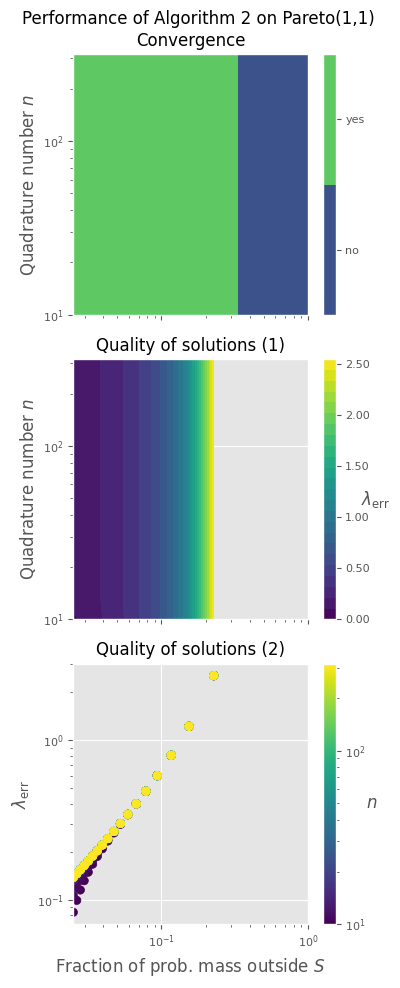

In [12]:
#Pareto
a, xm = 1, 1
test_performance_algo(title=f"Pareto({a},{xm})",
                    b_constraint=d.b_constraint_pareto,
                    f_constraint=d.f_constraint_pareto,
                    f_param=(a,xm),
                    lambda_actual=d.lambda_actual_pareto,
                    cdf=d.cdf_pareto,
                    lower_bound=xm)

/home/liselotp/BRP/max_entropy/python_files/maxent.py:363: RuntimeWarning: overflow encountered in exp
  c, s = quad(lambda x: np.exp(np.inner(self._la,


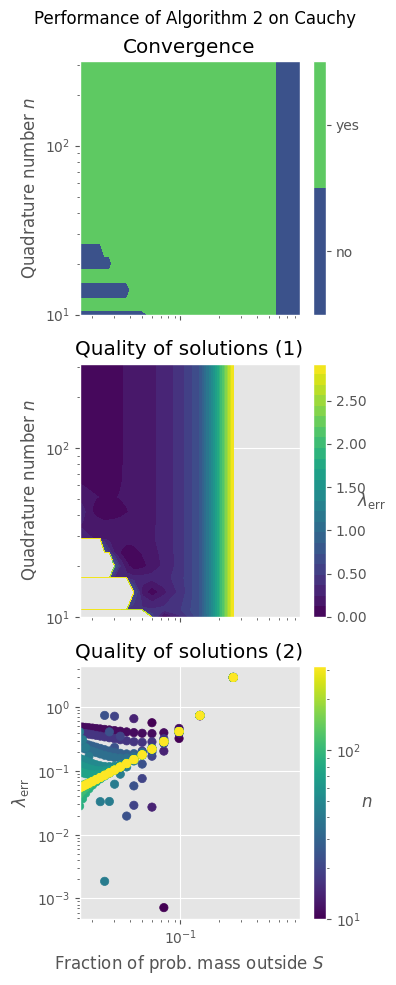

In [5]:
#Cauchy
test_performance_algo(title=f"Cauchy",
                    b_constraint=d.b_constraint_cauchy,
                    f_constraint=d.f_constraint_cauchy,
                    f_param=(),
                    lambda_actual=d.lambda_actual_cauchy,
                    cdf=d.cdf_cauchy)

/home/liselotp/BRP/max_entropy/python_files/maxent.py:363: RuntimeWarning: overflow encountered in exp
  c, s = quad(lambda x: np.exp(np.inner(self._la,


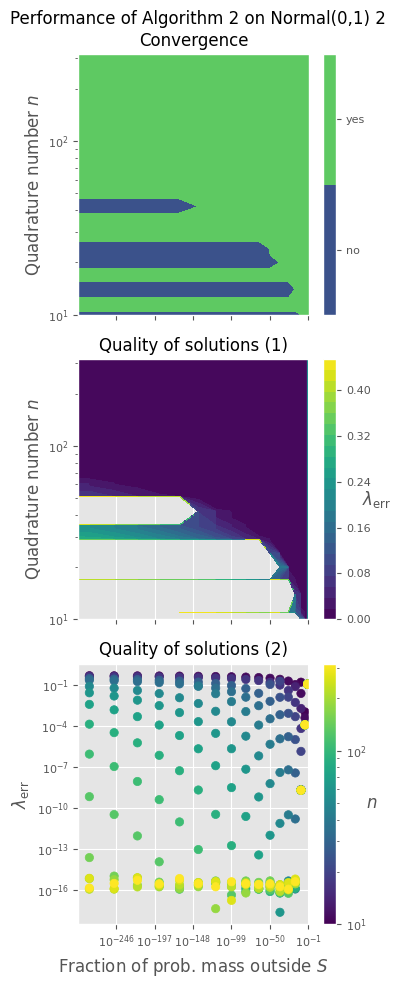

In [5]:
#normal 2
mu, s2 = 0, 1
test_performance_algo(title=f"Normal({mu},{s2}) 2",
                    b_constraint=d.b_constraint_normal2,
                    f_constraint=d.f_constraint_normal2,
                    f_param=(mu,s2),
                    lambda_actual=d.lambda_actual_normal2,
                    cdf=d.cdf_norm)

In [ ]:
#Lognormal
mu, s2 = 0, 1
test_performance_algo(title=f"Logormal({mu},{s2})",
                    b_constraint=d.b_constraint_log,
                    f_constraint=d.f_constraint_normal2,
                    f_param=(mu,s2),
                    lambda_actual=d.lambda_actual_normal2,
                    cdf=d.cdf_norm,
                    lower_bound=0)

Even though the algo still converges, for large enough support, the error increases.
The optimum seems to be at 0.998-0.999

In [27]:
ns = [15,30,70,100,200,300,360]

for n in ns:
    test_percentage_barrier_laplace(n=n,figure1=False, figure2=False, figure3=False, short=True)

/home/liselotp/BRP/max_entropy/python_files/maxent.py:362: RuntimeWarning: overflow encountered in exp
  self._f_vector(x,*self._f_param))),


n=15  || boundary=0.8168704466980252
n=30  || boundary=0.8162442262225358 || 0.9999999979388463
n=70  || boundary=0.8162442262225358 || 1.0
n=100  || boundary=0.8162442262225358 || 1.0
n=200  || boundary=0.8162442262225358
n=300  || boundary=0.8162442262225358
n=360  || boundary=0.8162442262225358


Interesting: when high enough, no upper bound!

In [10]:
n=300
test_percentage_barrier_laplace(n=n,figure1=True, figure2=True, figure3=True, short=False)

TypeError: MaxEnt.__init__() got an unexpected keyword argument 'message'

Best mass peprcentage depends on $n$!